In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
data = pd.read_csv('air_movement_changes_1_0.csv')
data.head()

,date,STATE,COUNTY,DAILY_AQI_VALUE,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,...,Grocery_Pharmacy_Increase,Grocery_Pharmacy_Decrease,Parks_Increase,Parks_Decrease,Transit_Stations_Increase,Transit_Stations_Decrease,Work_Increase,Work_Decrease,Home_Increase,Home_Decrease
0,2/15/20,Alabama,Jefferson,31.2,4.0,1.0,109.0,3.0,2.0,0.0,...,,,,,,,,,,
1,2/16/20,Alabama,Jefferson,50.2,2.0,-3.0,12.0,-2.0,-1.0,0.0,...,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease
2,2/17/20,Alabama,Jefferson,33.4,3.0,1.0,23.0,-3.0,-14.0,4.0,...,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase
3,2/18/20,Alabama,Jefferson,21.2,-9.0,-8.0,-27.0,0.0,-1.0,2.0,...,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase
4,2/19/20,Alabama,Jefferson,26.0,1.0,1.0,-12.0,-1.0,1.0,0.0,...,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease


In [6]:
X = data[["STATE", "date", "AQI_Percent_Change"]]
y = data["residential_percent_change_from_baseline"].values.reshape(-1, 1)
print(X.shape, y.shape)

(24007, 3) (24007, 1)


In [4]:
data["Label"] = data["DAILY_AQI_VALUE"].shift(-1)

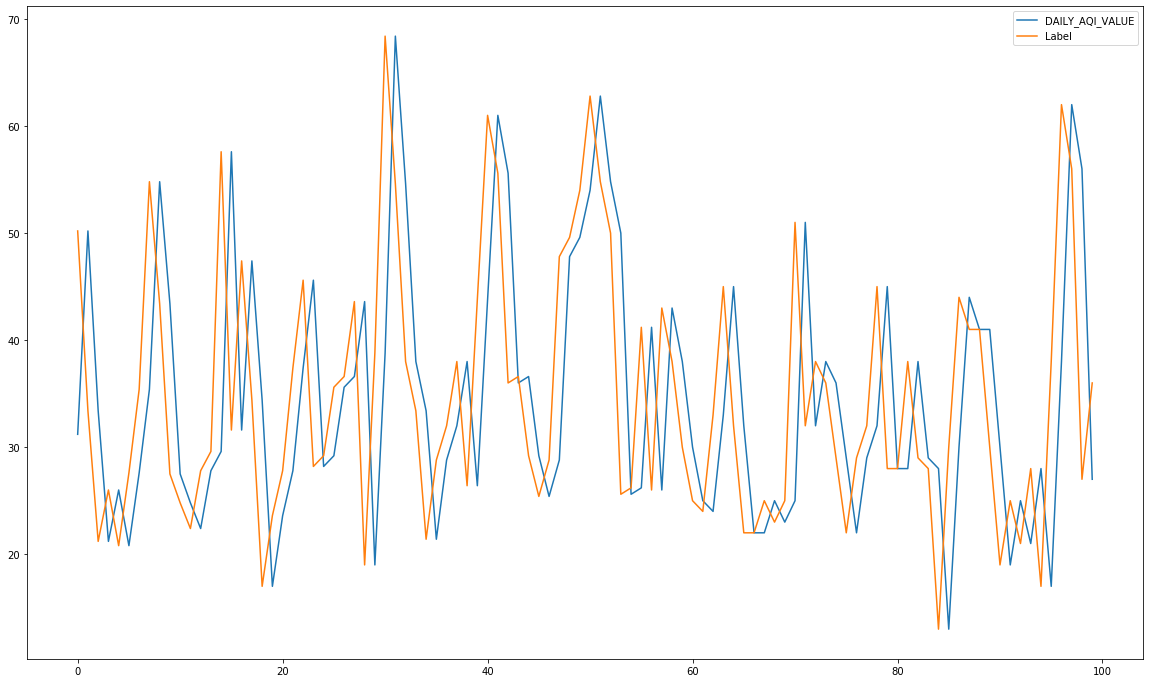

In [5]:
data[["DAILY_AQI_VALUE", "Label"]].iloc[:100].plot(figsize=(20,12));

In [6]:
#data.dropna(inplace=True)
data.tail()

,date,STATE,COUNTY,DAILY_AQI_VALUE,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,...,Grocery_Pharmacy_Decrease,Parks_Increase,Parks_Decrease,Transit_Stations_Increase,Transit_Stations_Decrease,Work_Increase,Work_Decrease,Home_Increase,Home_Decrease,Label
24002,4/7/20,Wyoming,Sweetwater,11.0,-29.0,-1.0,NaN,2.0,-36.0,12.0,...,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,8.0
24003,4/8/20,Wyoming,Sweetwater,8.0,-29.0,1.0,NaN,5.0,-36.0,12.0,...,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,6.0
24004,4/9/20,Wyoming,Sweetwater,6.0,-29.0,2.0,NaN,4.0,-36.0,11.0,...,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,4.0
24005,4/10/20,Wyoming,Sweetwater,4.0,-28.0,3.0,NaN,27.0,-44.0,15.0,...,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,Decrease,Increase,NaN
24006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN


In [7]:
df = pd.DataFrame()
df["Daily_AQI"] = data["DAILY_AQI_VALUE"]
df["label"] = data["Label"]
df.dropna(inplace=True)
df

,Daily_AQI,label
0,31.2,50.2
1,50.2,33.4
2,33.4,21.2
3,21.2,26.0
4,26.0,20.8
...,...,...
24000,5.0,11.0
24001,11.0,11.0
24002,11.0,8.0
24003,8.0,6.0


In [8]:
# 70% train, 10% val, 20% test

train_i = int(len(df.index) * 0.7)
val_i = int(len(df.index) * 0.8)

train_x = df["Daily_AQI"].iloc[:train_i].to_numpy()
train_y = df["label"].iloc[:train_i].to_numpy()

val_x = df["Daily_AQI"].iloc[train_i:val_i].to_numpy()
val_y = df["label"].iloc[train_i:val_i].to_numpy()

test_x = df["Daily_AQI"].iloc[val_i:].to_numpy()
test_y = df["label"].iloc[val_i:].to_numpy()

# df["column"] => pd series,  df["column", "column2"] is wrong
# df[["column"]] =>pd Dataframe, df[["column", "column2"]] is right

print(train_x.shape)
print(train_x)
print(train_y)

(16803,)
[31.2 50.2 33.4 ... 11.7 15.3 24. ]
[50.2 33.4 21.2 ... 15.3 24.  25.3]


In [11]:
#(sample, input_shape = features)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])
epochs = 100
#learning_rate = 0.0001

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
                           #loss=tf.keras.losses.MeanSquaredError(),
              metrics = ['acc'])
             #metric=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model.fit(train_x, train_y, epochs=100)
model.fit(
    train_x,
    train_y,
    epochs=epochs,
    validation_data = (val_x,val_y)
)

Train on 16803 samples, validate on 2401 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
16803/16803 [==============================] - 1s 54us/sample - loss: 476.4083 - acc: 0.0029 - val_loss: 167.2019 - val_acc: 0.0012
Epoch 2/100
16803/16803 [==============================] - 1s 40us/sample - loss: 146.6797 - acc: 0.0023 - val_loss: 164.2247 - val_acc: 0.0012
Epoch 3/100
16803/16803 [==============================] - 1s 48us/sample - loss: 145.0677 - acc: 0.0023 - val_loss: 162.2358 - val_acc: 0.0012
Epoch 4/100
16803/16803 [==============================] - 1s 49us/sample - loss: 143.3895 - acc: 0.0023 - val_loss: 159.9130 - val_acc: 0.0012
Epoch 5/100
16803/16803 [==============================] - 1s 43us/sample - loss: 141.5689 - acc: 0.0023 - val_loss: 157.5960 - val_acc: 0.0012
Epoch 6/100
16803/16803 [==============================] - 1s 67us/sample - loss: 139.5967 - acc: 0.0023 - val_loss: 155.0675 - val_acc: 0.0012
Epoch 7/100
16803/16803 [==============

16803/16803 [==============================] - 1s 45us/sample - loss: 128.4411 - acc: 0.0023 - val_loss: 136.7376 - val_acc: 0.0012
Epoch 56/100
16803/16803 [==============================] - 1s 47us/sample - loss: 128.4890 - acc: 0.0023 - val_loss: 136.9265 - val_acc: 0.0012
Epoch 57/100
16803/16803 [==============================] - 1s 54us/sample - loss: 128.4926 - acc: 0.0023 - val_loss: 136.7532 - val_acc: 0.0012
Epoch 58/100
16803/16803 [==============================] - 1s 42us/sample - loss: 128.4792 - acc: 0.0023 - val_loss: 136.7104 - val_acc: 0.0012
Epoch 59/100
16803/16803 [==============================] - 1s 47us/sample - loss: 128.5217 - acc: 0.0023 - val_loss: 136.7088 - val_acc: 0.0012s - loss: 128.3786 - acc: 
Epoch 60/100
16803/16803 [==============================] - 1s 46us/sample - loss: 128.5120 - acc: 0.0023 - val_loss: 136.8147 - val_acc: 0.0012
Epoch 61/100
16803/16803 [==============================] - 1s 56us/sample - loss: 128.4958 - acc: 0.0023 - val_loss: